In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas

from collections import defaultdict, Counter

<img src="img/Exercise01.png" width=600>

In [22]:
N = [5, 10, 20, 100, 1000]
a = 1

In [23]:
norm = mpl.colors.LogNorm(5, 1e3)
cmap = mpl.cm.get_cmap("viridis")

## Define the transformations 

In [24]:
def random_uniform(n, a=1):
    u = np.random.rand(n)
    return 2 * u - 1

def gaussian(n, a=1):
    return np.random.randn(n)

def two_sided_laplacian(n, a=1):
    u = np.random.rand(n)
    return np.sign(np.random.randn(*u.shape)) * np.log(u) / a

def cauchy(n, a=1):
    u = np.random.rand(n)
    return a * np.tan(np.pi * (u - 0.5))

### Random Uniform 

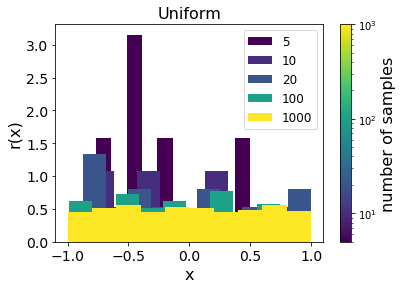

In [25]:
for n in N:
    r = random_uniform(n)
    plt.hist(r, density=True, label=n, color=cmap(norm(n)))
    
plt.legend(fontsize=12)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label("number of samples", fontsize=16)

plt.title("Uniform", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.ylabel("r(x)", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Gaussian 

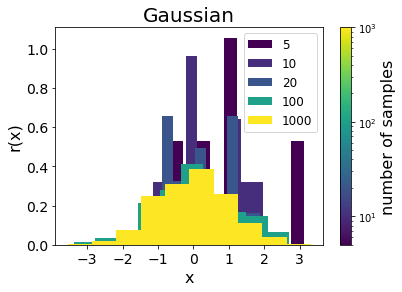

In [26]:
for n in N:
    r = gaussian(n)
    plt.hist(r, density=True, label=n, color=cmap(norm(n)))

plt.title("Gaussian", fontsize=20)
plt.legend(fontsize=12)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label("number of samples", fontsize=16)

plt.xlabel("x", fontsize=16)
plt.ylabel("r(x)", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Two sided laplace

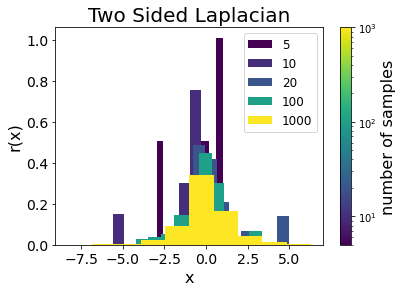

In [27]:
for n in N:
    
    r = two_sided_laplacian(n)
    plt.hist(r, density=True, label=n, color=cmap(norm(n)))
    
plt.legend(fontsize=12)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label("number of samples", fontsize=16)

plt.title("Two Sided Laplacian", fontsize=20)
plt.xlabel("x", fontsize=16)
plt.ylabel("r(x)", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Cauchy / Student t 

(-10.0, 10.0)

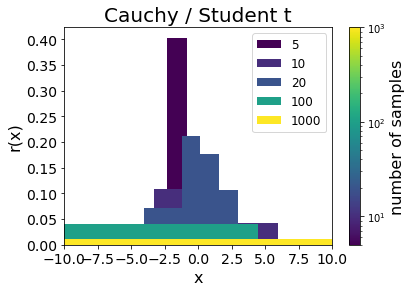

In [28]:
for n in N:
    u = np.random.rand(n)
    
    r = cauchy(n)    
    plt.hist(r, density=True, label=n, color=cmap(norm(n)))
    
plt.legend(fontsize=12)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label("number of samples", fontsize=16)

plt.title("Cauchy / Student t", fontsize=20)
plt.xlabel("x", fontsize=16)
plt.ylabel("r(x)", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlim([-10, 10])

# Task B

<img src="img/Exercise01.png" width=600>

for a given data d = f + eps, we get a probability like so

$$p(f| d) = p(d | f ) * p(f) / p(d) $$

We assume the prior $p(f)$ to be const. Here $f = \mu$, i.e. a linear model.

## Gaussian

In [29]:
from utilities import flat

In [30]:
def gaussian(mu, sigma):
    return np.exp(-0.5*mu**2/sigma**2) / (sigma * np.sqrt(2 * np.pi))

def uniform(mu):
    return flat(x=mu, lower=-1, upper=1)

def two_sided_laplacian(x, a):
    return (a/2) * np.exp(-a * np.abs(x))

def cauchy(x, a):
    return a / (np.pi * (a**2 + x**2))

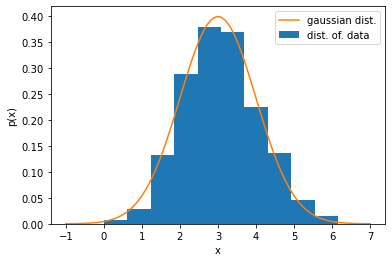

In [37]:
mu_actual = 3
data = np.random.randn(1000) + mu_actual

plt.hist(data, density=True, label="dist. of. data")
x = np.linspace(-1, 7, 100)
plt.plot(x, gaussian(mu=x - mu_actual, sigma=1), label="gaussian dist.")

plt.xlabel("x"),
plt.ylabel("p(x)")
plt.legend()

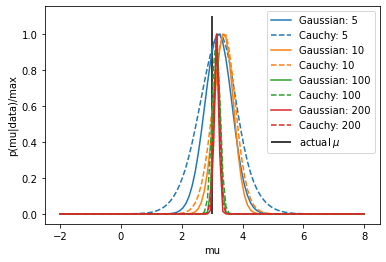

In [53]:
x = np.linspace(-2, 8, 100)

for n in [5, 10, 100, 200,]:

    d = data[:n]

    xx, dd = np.meshgrid(x, d)

    # posterior p(mu|data) = p(data|mu) * const, const=1, if p(data|mu) normed
    p = np.prod(gaussian(xx-dd, sigma=1), axis=0)
    color = plt.plot(x, p/np.max(p), "-", label=f"Gaussian: {n}")[0].get_color()

    p = np.prod(cauchy(x=xx-dd, a=1), axis=0)
    plt.plot(x, p/np.max(p), "--", label=f"Cauchy: {n}", color=color)

plt.vlines(x=mu_actual, ymin=0, ymax=1.1, label="actual $\mu$", color="k")
plt.legend()

plt.xlabel("mu");
plt.ylabel("p(mu|data)/max");


